# Driving Visual Analyses with Automobile Data

## Preparing to analyze autmobile fuel efficiencies
In this section the analysis of fuel efficiencies is started.

Libraries are imported and the csv file is loaded

In [1]:
#Import needed libraries and configure graphs to be shown inline
import pandas as pd
import numpy as np
from ggplot import *
from functools import reduce
%matplotlib inline

C:\Users\Robert\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Robert\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\Robert\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Import the vehicles data set and show the first few rows in the data set
vehicles = pd.read_csv("vehicles.csv")
vehicles.head

C:\Users\Robert\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<bound method NDFrame.head of        barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.695714         0.0        0.0        0.0      19      0.0        0   
1      29.964545         0.0        0.0        0.0       9      0.0        0   
2      12.207778         0.0        0.0        0.0      23      0.0        0   
3      29.964545         0.0        0.0        0.0      10      0.0        0   
4      17.347895         0.0        0.0        0.0      17      0.0        0   
5      14.982273         0.0        0.0        0.0      21      0.0        0   
6      13.184400         0.0        0.0        0.0      22      0.0        0   
7      13.733750         0.0        0.0        0.0      23      0.0        0   
8      12.677308         0.0        0.0        0.0      23      0.0        0   
9      13.184400         0.0        0.0        0.0      23      0.0        0   
10     12.677308         0.0        0.0        0.0      23      0.0        0   
11     15.

In [3]:
column_names = vehicles.columns.values
column_names[[70,71,72,73,74,76,79]]

array(['fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr',
       'c240bDscr', 'startStop'], dtype=object)

## Exploring and describing fuel efficiency data with Python

In this section a basic analysis of the fuel efficiency is conducted.

In [4]:
#get the number of observations that are in the data set
len(vehicles)

39027

In [5]:
#get the number of columns in the data set
len(vehicles.columns)

83

In [6]:
#get the headers or the names of the columns for the data set
print(vehicles.columns)

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [7]:
#In this section the number of years are obtained and the min and max year are also obtained
len(pd.unique(vehicles.year))

35

In [8]:
#with a pandas data frame you can index a value as either an object or an array index
min(vehicles.year) # object

1984

In [9]:
max(vehicles["year"]) #array index

2018

In [10]:
#Get the number types of fuel used and the number of vehicles of each fuel type
pd.value_counts(vehicles.fuelType1)

Regular Gasoline     26887
Premium Gasoline     10760
Diesel                1088
Electricity            142
Midgrade Gasoline       90
Natural Gas             60
Name: fuelType1, dtype: int64

In [11]:
#Get the vehicle transaction types and counts
pd.value_counts(vehicles.trany)

Automatic 4-spd                     11045
Manual 5-spd                         8333
Automatic 3-spd                      3151
Automatic (S6)                       2825
Manual 6-spd                         2562
Automatic 5-spd                      2191
Automatic 6-spd                      1520
Manual 4-spd                         1483
Automatic (S8)                       1161
Automatic (S5)                        830
Automatic (variable gear ratios)      725
Automatic 7-spd                       693
Automatic 8-spd                       323
Automatic (AM-S7)                     320
Automatic (S7)                        288
Automatic (S4)                        233
Automatic (AM7)                       194
Automatic (AV-S6)                     172
Automatic 9-spd                       165
Automatic (A1)                        134
Automatic (AM6)                       122
Automatic (AM-S6)                     106
Automatic (AV-S7)                      95
Manual 7-spd                      

The above output is length. As a note all of the autmoatic transmissions start with an "A" and manuals "M".
To simplify we will create a new transmission variable "trany2" and save just the first letter of the trany field

In [12]:
#Save first letter of trany to trany2
vehicles["trany2"] = vehicles.trany.str[0]

#get counts of automatic or manual
pd.value_counts(vehicles.trany2)

A    26451
M    12565
Name: trany2, dtype: int64

## Analyzing automobile fuel efficiency over time with Python

This section takes the fuel efficiency data set and graphs the change overtime to see if there is a correlation between time and the average MPG

In [13]:
#group the vehicles by year and save them to the grouped variable
grouped = vehicles.groupby("year")

In [14]:
#calculate the average for the following three variables by year
# comb08- the combined mpg for fueltype1
# highway08- the highway mpg for fueltype1
# city08- the city mpg for fueltype1
averaged = grouped['comb08', 'highway08', 'city08'].agg([np.mean])

In [15]:
#rename the columns to reflect what they actually pertain to
averaged.columns = ['comb08_mean', 'highway08_mean', 'city08_mean']

#create a new column year that contains the data frame's index
averaged['year'] = averaged.index

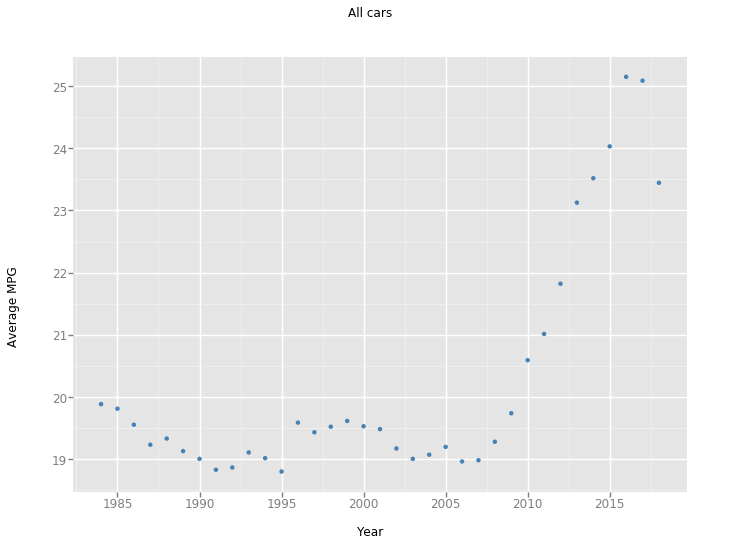

<ggplot: (-9223371904547519281)>


In [16]:
#Build a graph that shows the average mpg over time
print(ggplot(averaged, aes('year', 'comb08_mean')) +
                geom_point(color = 'steelblue') + xlab("Year") + ylab("Average MPG") +
                ggtitle("All cars"))

The data points in later years in the above graph can be misleading as hybrid cars became available. The hybrid cars generally have better gas mileage and can skew the results. The next steps will filter out the hybrid vehicles.

In [17]:
#Criteria 1 filters out results that have any of 3 fuel types- Regular, Premium, Midgrade
criteria1 = vehicles.fuelType1.isin(["Regular Gasoline", "Premium Gasoline", "Midgrade Gasoline"])

#criteria 2 checks that fuel type 2 is null
criteria2 = vehicles.fuelType2.isnull()

#criteria 3 checks that the atv type is not a hybrid
criteria3 = vehicles.atvType != "Hybrid"

#filter out vehicles that match all 3 criteria
vehicles_non_hybrid = vehicles[criteria1 & criteria2 & criteria3]

#get the count of vehicles that match all 3 criteria
len(vehicles_non_hybrid)

35753

In [18]:
#Group the non hybrid vehicles by year
grouped = vehicles_non_hybrid.groupby(['year'])

#average the combined mpg
averaged = grouped['comb08'].agg([np.mean])

#print the averaged combined mpg
print(averaged)

           mean
year           
1984  19.121622
1985  19.394686
1986  19.320457
1987  19.164568
1988  19.367607
1989  19.141964
1990  19.031459
1991  18.838060
1992  18.861566
1993  19.137383
1994  19.092632
1995  18.872591
1996  19.530962
1997  19.368000
1998  19.329545
1999  19.239759
2000  19.169345
2001  19.075058
2002  18.950270
2003  18.761711
2004  18.967339
2005  19.005510
2006  18.786398
2007  18.987512
2008  19.191781
2009  19.738095
2010  20.466736
2011  20.838219
2012  21.407328
2013  22.228877
2014  22.279835
2015  22.418539
2016  22.742509
2017  22.817854
2018  22.982167


In [19]:
# Get unique engine displacement values

pd.unique(vehicles_non_hybrid.displ)

array([ 2. ,  4.9,  2.2,  5.2,  1.8,  1.6,  2.3,  2.8,  4. ,  5. ,  3.3,
        3.1,  3.8,  4.6,  3.4,  3. ,  5.9,  2.5,  4.5,  6.8,  2.4,  2.9,
        5.7,  4.3,  3.5,  5.8,  3.2,  4.2,  1.9,  2.6,  7.4,  3.9,  1.5,
        1.3,  4.1,  8. ,  6. ,  3.6,  5.4,  5.6,  1. ,  2.1,  1.2,  6.5,
        2.7,  4.7,  5.5,  1.1,  5.3,  4.4,  3.7,  6.7,  4.8,  1.7,  6.2,
        8.3,  1.4,  6.1,  7. ,  8.4,  6.3,  nan,  6.6,  6.4,  0.9])

In [20]:
# Filter out null displacement values and convert values to float
criteria = vehicles_non_hybrid.displ.notnull()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid.displ = vehicles_non_hybrid.displ.astype('float')

# Filter out null combined gas mileage and convert to float
criteria = vehicles_non_hybrid.comb08.notnull()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid.comb08 = vehicles_non_hybrid.comb08.astype('float')

C:\Users\Robert\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


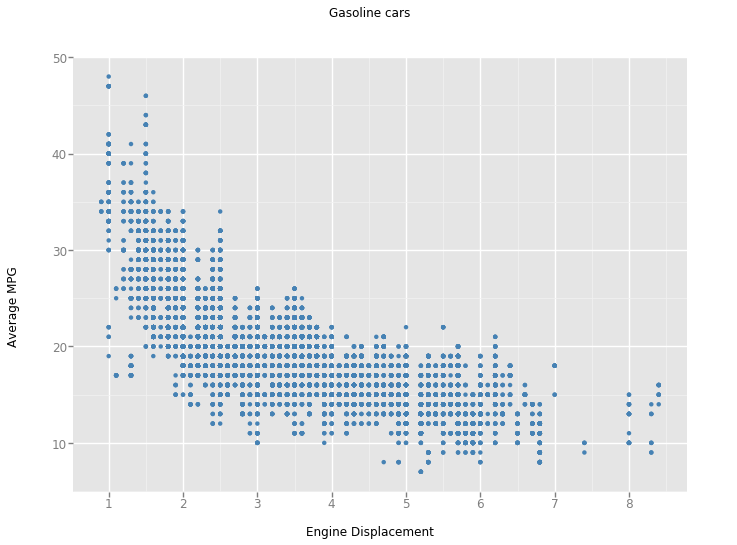

<ggplot: (-9223371904554099659)>


In [21]:
# Graph the engine displacement versus average MPG

print(ggplot(vehicles_non_hybrid, aes('displ', 'comb08')) +
     geom_point(color='steelblue') + xlab("Engine Displacement") +
     ylab("Average MPG") + ggtitle("Gasoline cars"))

In [22]:
# Group vehicles by year and then average combined mpg and engine displacement
grouped_by_year = vehicles_non_hybrid.groupby(['year'])
avg_grouped_by_year = grouped_by_year['displ','comb08'].agg([np.mean])

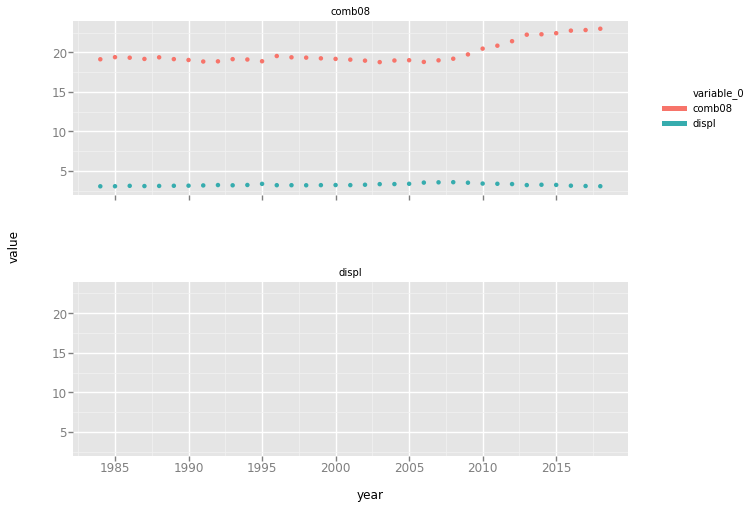

<ggplot: (-9223371904546952353)>

In [23]:
# Graph the average displacement and average mpg by year

# Split the data set with year as the id and comb08 and displ as values
avg_grouped_by_year['year'] = avg_grouped_by_year.index
melted_avg_grouped_by_year = pd.melt(avg_grouped_by_year, id_vars='year')

#print(melted_avg_grouped_by_year)
#build the graph
p = ggplot(aes(x='year', y='value', color='variable_0'),
          data=melted_avg_grouped_by_year)
p + geom_point() + facet_wrap("variable_0")

## Investigationg the makes and models of automobiles with Python

In this section data is further analyzed to create graphs of makes and their average mpg

In [24]:
# Get unique cylinder counts for engines
pd.unique(vehicles_non_hybrid.cylinders)

array([  4.,  12.,   8.,   6.,   5.,  10.,   2.,   3.,  16.,  nan])

In [25]:
#Convert cylinders to float type
vehicles_non_hybrid.cylinders = vehicles_non_hybrid.cylinders.astype('float')
#get unique cylinders
pd.unique(vehicles_non_hybrid.cylinders)

#filter out just 4 cylinder engines
vehicles_non_hybrid_4 = vehicles_non_hybrid[(vehicles_non_hybrid.cylinders == 4.0)]

Axes(0.125,0.125;0.775x0.755)


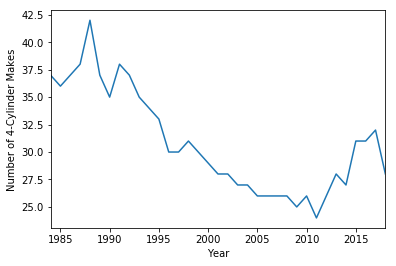

In [26]:
#group 4 cylinder engines by year
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year']).make.nunique()

#build a plot
fig = grouped_by_year_4_cylinder.plot()
fig.set_xlabel('Year')
fig.set_ylabel('Number of 4-Cylinder Makes')
print(fig)

In [27]:
#Extract all data on 4 cylinder engines
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year'])

#Extract unique makes
unique_makes = []
for name, group in grouped_by_year_4_cylinder:
    unique_makes.append(set(pd.unique(group['make'])))
    
unique_makes = reduce(set.intersection,unique_makes)
print(unique_makes)

{'Subaru', 'Volkswagen', 'Ford', 'Honda', 'Nissan', 'Dodge', 'Chevrolet', 'Mazda', 'Jeep', 'Toyota'}


In [28]:
#mask data for makes that are in the unique_makes list
# so that we can graph their performance over time
boolean_mask = []
for index, row in vehicles_non_hybrid_4.iterrows():
    make = row['make']
    boolean_mask.append(make in unique_makes)
    
df_common_makes = vehicles_non_hybrid_4[boolean_mask]

In [29]:
#group the data frame by year and make
# then calculate the average mpg
df_common_makes_grouped = df_common_makes.groupby(['year', 'make']).agg(np.mean).reset_index()

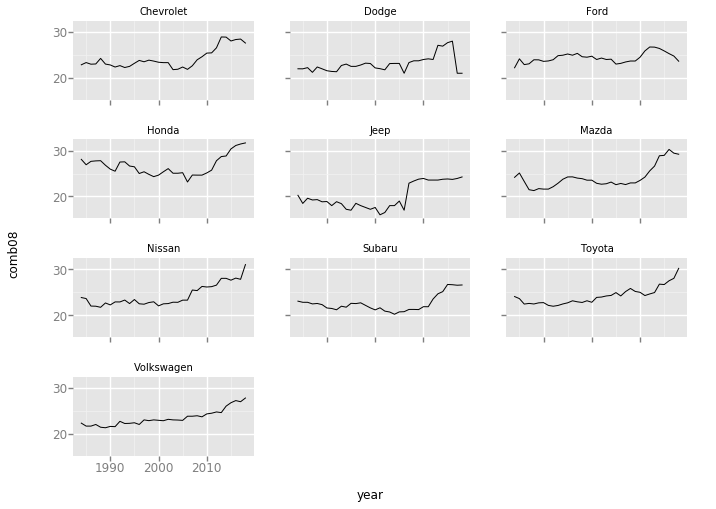

<ggplot: (132309184758)>

In [30]:
#graph the makes average mpg over time
ggplot(aes(x='year', y='comb08'), data = 
      df_common_makes_grouped) + geom_line() + facet_wrap('make')